## Machine Learning
### TP 6 - Arbre de décisions et forêts aléatoires

Vous utiliserez la librairie <a href="https://scikit-learn.org/stable/">scikit-learn</a> pour récupérer les données IRIS dont vous trouverez une description <a href="https://scikit-learn.org/stable/datasets/index.html#iris-plants-dataset"> ici </a>.



# Librairies

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.pyplot import hist, scatter
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Raw data


La description du jeu de données est sur le site de <a href="https://scikit-learn.org/stable/datasets/index.html#iris-plants-dataset"> scikit-learn </a>.

Vous devriez avoir 150 observations décrites par 4 features (largeur et longeur en cm du sépal et du pétal de chaque iris). Pour info:

<img src="https://www.pngkey.com/png/full/82-826789_iris-iris-sepal-and-petal.png" height=150/>



1. Lire des données IRIS. Nombre d'observations ? Dimension des observations ? Combien de classes ? Jeu équilibré ? Description des variables ? (voire <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html">load_iris</a> pour récupérer les données)

In [28]:
raw_data = load_iris()
X = raw_data['data']
Y = raw_data['target']



print('-----\n',len(X))
print(Y)
x = pd.DataFrame(X)
print('-----\n',x.describe())
print(x.isnull().sum())
print(x.info())


-----
 150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
-----
                 0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333
std      0.828066    0.435866    1.765298    0.762238
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000
0    0
1    0
2    0
3    0
dtype: int64
<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  ------

2. Nom des features ? (La fonction ``load_iris`` retourne un dictionnaire...)

In [29]:
print(raw_data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Visualisation
Visualisation avec <a href="https://seaborn.pydata.org/"> seaborn </a>.

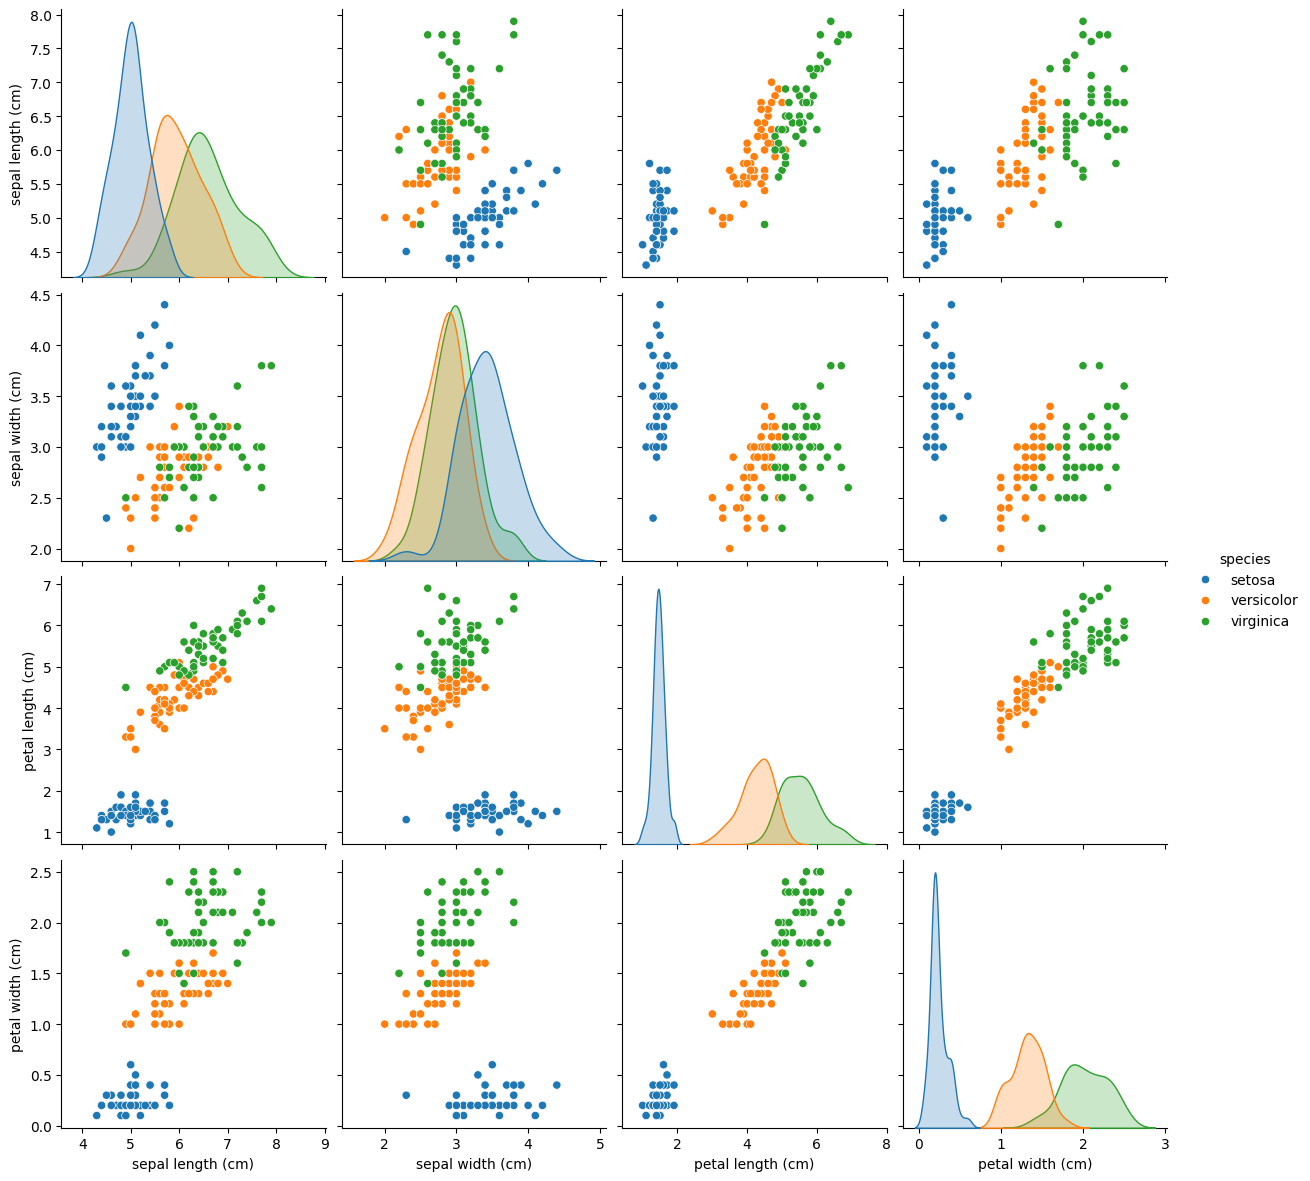

In [30]:
# Dataframe
df = pd.DataFrame(X, columns=raw_data.feature_names)
df['target'] = Y
df['species'] = df['target'].map({0:raw_data.target_names[0], 1:raw_data.target_names[1], 2:raw_data.target_names[2]})

# Pair plot with seaborn
sns.pairplot(df.drop('target', axis=1), height=3, hue="species");

3. Quelle classe vous semble la plus facilement séparable ? Sur quel(s) attribut(s) vous basez vous ?

In [31]:
# la classe la plus facilement séparable est setosa car c'est celle qui est le moins corrélée avec les autres
# on le voit sur la répartition des points et sur les graphiques

## Train/Test


4. Créer les matrices X_train, X_test, Y_train, Y_test avec un ratio 50% (voire <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split</a>).



In [32]:
# Train/Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

# Shape
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(75, 4)
(75, 4)
(75,)
(75,)


# Model


5. Instance et entrainement d'un arbre de décision avec l'entropie comme critère de pureté des noeuds (voire <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">DecisionTreeClassifier</a>)

In [33]:
#on cree notre modele d'arbre de decision

clf = tree.DecisionTreeClassifier(criterion = 'entropy') #entre parenthese on peut donner des conditions
# criterion pour le critere ici l'entropy
#max_depht est la profondeur ie: le nombre max  de noeud
#min_samples est le nombre min dans chaque categorie

clf = clf.fit(X_train,Y_train)

Y_pred = clf.predict(X_test)

6. Evaluation du modèle avec matrice de confusion et accuracy en train et en test.

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

print("Training set score: %f" % clf.score(X_train,Y_train))
print("Test set score: %f" % clf.score(X_test,Y_test))

# Affiche la matrice de confusion:
print(confusion_matrix(Y_test,Y_pred))

#texte de rapport rapport plus precis de ce qu'on trouve
print(classification_report(Y_test,Y_pred))

print('-------')
print(accuracy_score(Y_test,Y_pred))
print('-------')

# d'apres les metrics nous voyons que l'on a :
# 26 de la classe 0 correctement prédit (vrai 0)
# 19 de la classe 1 bien predit (vrai 1) et 2 mal predit (faux 1)
# 26 de la classe 2 correctement prédit (vrai 2) et 2 mal predit (faux 2)

# accuracy_score = 0.94667

Training set score: 1.000000
Test set score: 0.933333
[[27  0  0]
 [ 0 22  5]
 [ 0  0 21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.81      0.90        27
           2       0.81      1.00      0.89        21

    accuracy                           0.93        75
   macro avg       0.94      0.94      0.93        75
weighted avg       0.95      0.93      0.93        75

-------
0.9333333333333333
-------


7. Visualisation de l'arbre appris (voire <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html">plot_tree</a>). Le premier test à la racine de l'arbre est-il bien cohérent avec votre réponse à la question  3?

[Text(0.375, 0.9, 'x[3] <= 0.7\nentropy = 1.576\nsamples = 75\nvalue = [23, 23, 29]'),
 Text(0.25, 0.7, 'entropy = 0.0\nsamples = 23\nvalue = [23, 0, 0]'),
 Text(0.3125, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[2] <= 4.8\nentropy = 0.99\nsamples = 52\nvalue = [0, 23, 29]'),
 Text(0.4375, 0.8, '  False'),
 Text(0.25, 0.5, 'x[3] <= 1.6\nentropy = 0.258\nsamples = 23\nvalue = [0, 22, 1]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 22\nvalue = [0, 22, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.5, 'x[2] <= 4.95\nentropy = 0.216\nsamples = 29\nvalue = [0, 1, 28]'),
 Text(0.625, 0.3, 'x[1] <= 2.6\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 26\nvalue = [0, 0, 26]')]

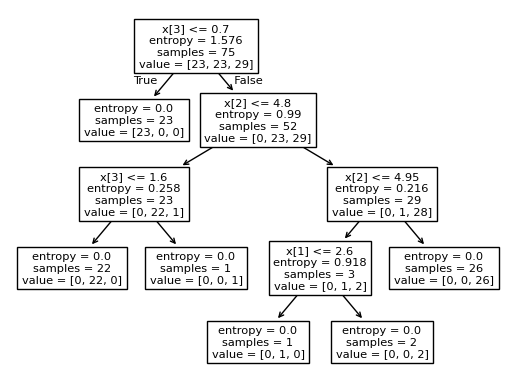

In [35]:
# on visualise l'arbre "clf" avec plot_tree
tree.plot_tree(clf)

8. Visualisation de l'arbre appris jusqu'à la profondeur 1.

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.7\nentropy = 1.576\nsamples = 75\nvalue = [23, 23, 29]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 23\nvalue = [23, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.8\nentropy = 0.99\nsamples = 52\nvalue = [0, 23, 29]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.8, 0.16666666666666666, '\n  (...)  \n')]

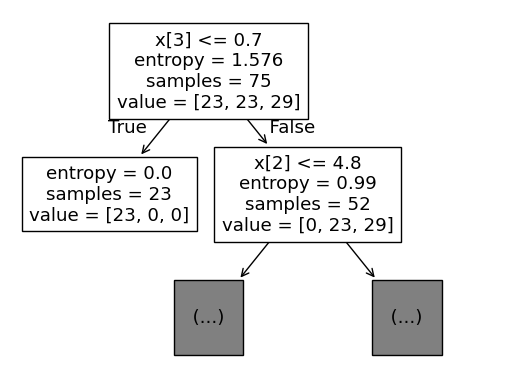

In [36]:
# profondeur 1 donc max_depht = 1
tree.plot_tree(clf, max_depth = 1)

## Bagging
Autre solution pour réduire le sur-apprentissage : <a href="https://en.wikipedia.org/wiki/Bootstrap_aggregating">le bagging</a>.

9. Réaliser une validation croisée avec comme modèle un arbre de décision. Vous retournerez les 10 instances de modèles apprises ainsi que les scores d'accuracy associés (voire <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html">cross_validate</a>
et <a href="https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values">string evaluation function </a>).

In [37]:
# notre modele est un arbre de decision DecisionTreeClassifier appelé clf
# nos données sont X_train et Y_train et on veut 10 instances donc cv = 10
out = cross_validate(clf, X=X_train, y=Y_train, cv = 10, scoring ='accuracy',return_estimator = True)

# test_score est celui qui nous interesse c'est l'accuracy de chaques instance.

#print('-- estimator --\n',out['estimator'])
estimateur = out['estimator'] # ce sont les 10 instances d'arbres.

for i in range(10):
  print('Score estimateur',i+1,':',out['test_score'][i])
  print('----------------')


Score estimateur 1 : 1.0
----------------
Score estimateur 2 : 1.0
----------------
Score estimateur 3 : 0.875
----------------
Score estimateur 4 : 0.875
----------------
Score estimateur 5 : 0.875
----------------
Score estimateur 6 : 1.0
----------------
Score estimateur 7 : 1.0
----------------
Score estimateur 8 : 1.0
----------------
Score estimateur 9 : 1.0
----------------
Score estimateur 10 : 1.0
----------------


10. Afficher quelques arbres appris et comparez les.

arbre 1


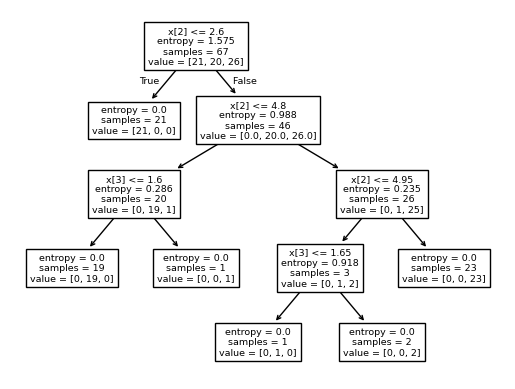

arbre 2


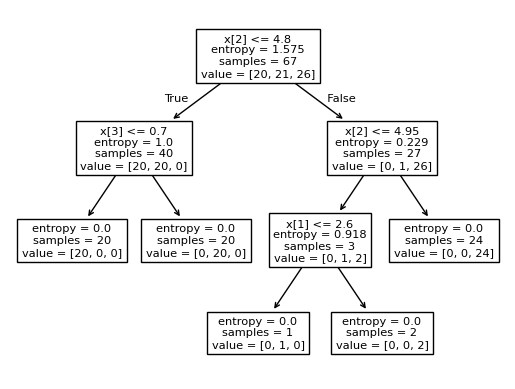

arbre 3


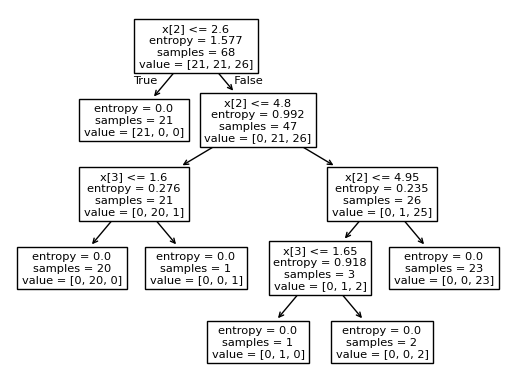

In [38]:
# on va afficher 3 de nos arbres l'instance 0, la 3 et la 6
print('arbre 1')
tree.plot_tree(estimateur[0])
plt.show()
print('arbre 2')
tree.plot_tree(estimateur[3])
plt.show()
print('arbre 3')
tree.plot_tree(estimateur[6])
plt.show()

11. Créez la matrice qui associe à chaque exemple les différentes prédictions des différents estimateurs appris (voire <a href="http://book.pythontips.com/en/latest/enumerate.html">enumerate</a>). Quelle solution proposez vous pour classer chaque exemple à partir de cette matrice ?

In [39]:
# estimateur est notre liste des instances

y_pred = np.zeros((len(Y_test), len(out['estimator'])))
# on veut notre matrice qui aura en ligne la taille de Y_test et en colonne le nombre d'estimateurs.
# notre matrice aura donc 75 lignes et 10 colonne et chaque colonne est compose de la prediction de X_test
# par estimateur[i] c'est à dire : estimateur[i].predict(X_test)

# methode sans le enumerate
M = []
for i in range(len(estimateur)):
  M.append(estimateur[i].predict(X_test))

M = np.matrix(M)
M = np.transpose(M)
print(M.shape)

(75, 10)


In [40]:
# methode avec le enumerate

M1 = []
for i, esti in enumerate(out['estimator']):
  y_pred1 = esti.predict(X_test)
  M1.append(y_pred1)

M1 = np.matrix(M1)
M1 = np.transpose(M1)
print(M1.shape)

(75, 10)


## Forêt aléatoire

12. Instance et entrainement d' <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">arbre aléatoire</a> avec 10 arbres, critère entropy.

In [41]:
model = RandomForestClassifier(criterion = 'entropy',n_estimators = 10)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

13. Evaluation train/test

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print("Training set score: %f" % model.score(X_train,Y_train))
print("Test set score: %f" % model.score(X_test,Y_test))
# Affiche la matrice de confusion:
print(confusion_matrix(Y_test,Y_pred))
#texte de rapport rapport plus precis de ce qu'on trouve
print(classification_report(Y_test,Y_pred))

print(accuracy_score(Y_test,Y_pred))
print('-------')

# d'apres les metrics nous voyons que l'on a :
# 26 de la classe 0 correctement prédit (vrai 0)
# 19 de la classe 1 bien predit (vrai 1) et 2 mal predit (faux 1)
# 25 de la classe 2 correctement prédit (vrai 2) et 3 de la classe 2 mal predit (faux 2)

# accuracy_score = 0.9333

Training set score: 1.000000
Test set score: 0.960000
[[27  0  0]
 [ 0 24  3]
 [ 0  0 21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.89      0.94        27
           2       0.88      1.00      0.93        21

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

0.96
-------


14. Lister les instances d'arbres apprises et visualiser en quelque uns.

arbre 1


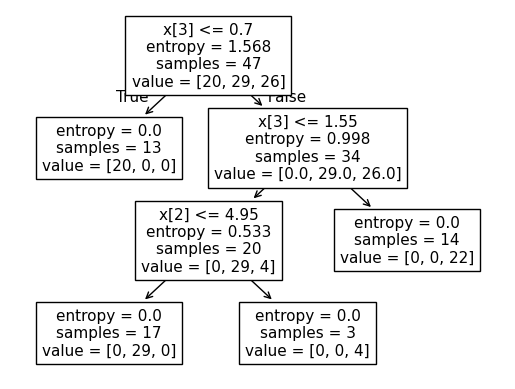

arbre 3


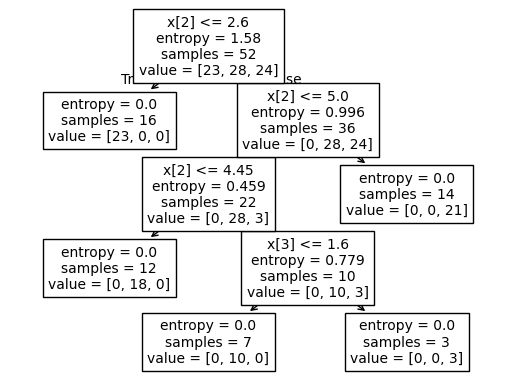

arbre 6


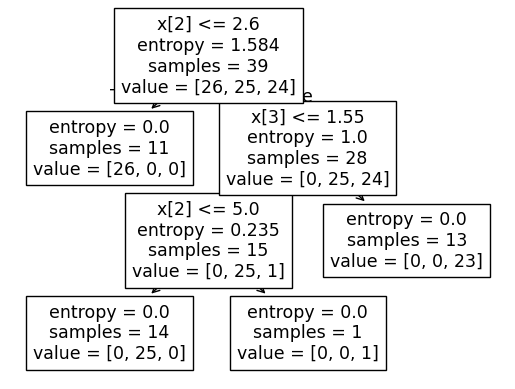

In [43]:
# c'est notre liste des modeles.
esti_arbre = model.estimators_

print("arbre 1")
tree.plot_tree(esti_arbre[0])
plt.show()
print("arbre 3")
tree.plot_tree(esti_arbre[3])
plt.show()
print("arbre 6")
tree.plot_tree(esti_arbre[6])
plt.show()


15. Importance des features. Quel est la variable la plus discriminante selon votre modèle ?

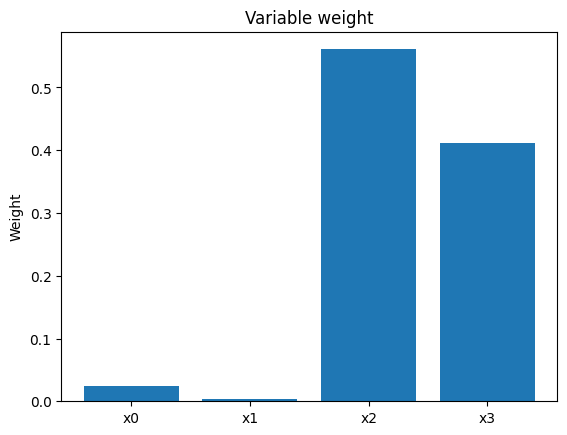

In [44]:
plt.bar(["x0", "x1", "x2", "x3"], list(model.feature_importances_), orientation = 'vertical')
plt.ylabel('Weight');
plt.title('Variable weight');